In [3]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'cleaned_gym_churn_us.csv'
df = pd.read_csv('cleaned_gym_churn_us.csv')

# Print the first 5 rows to get a quick look at the data
print("First 5 rows of the dataset:")
print(df.head())

# Print information about the dataset, including data types and non-null counts
print("\nInformation about the dataset:")
df.info()

First 5 rows of the dataset:
   Unnamed: 0  gender  Near_Location  Partner  Promo_friends  Phone  \
0           0    True           True     True           True  False   
1           1   False           True    False          False   True   
2           2   False           True     True          False   True   
3           3   False           True     True           True   True   
4           4    True           True     True           True   True   

   Contract_period  Group_visits  Age  Avg_additional_charges_total  \
0                6          True   29                     14.227470   
1               12          True   31                    113.202938   
2                1         False   28                    129.448479   
3               12          True   33                     62.669863   
4                1         False   26                    198.362265   

   Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
0                    5.0         3                  

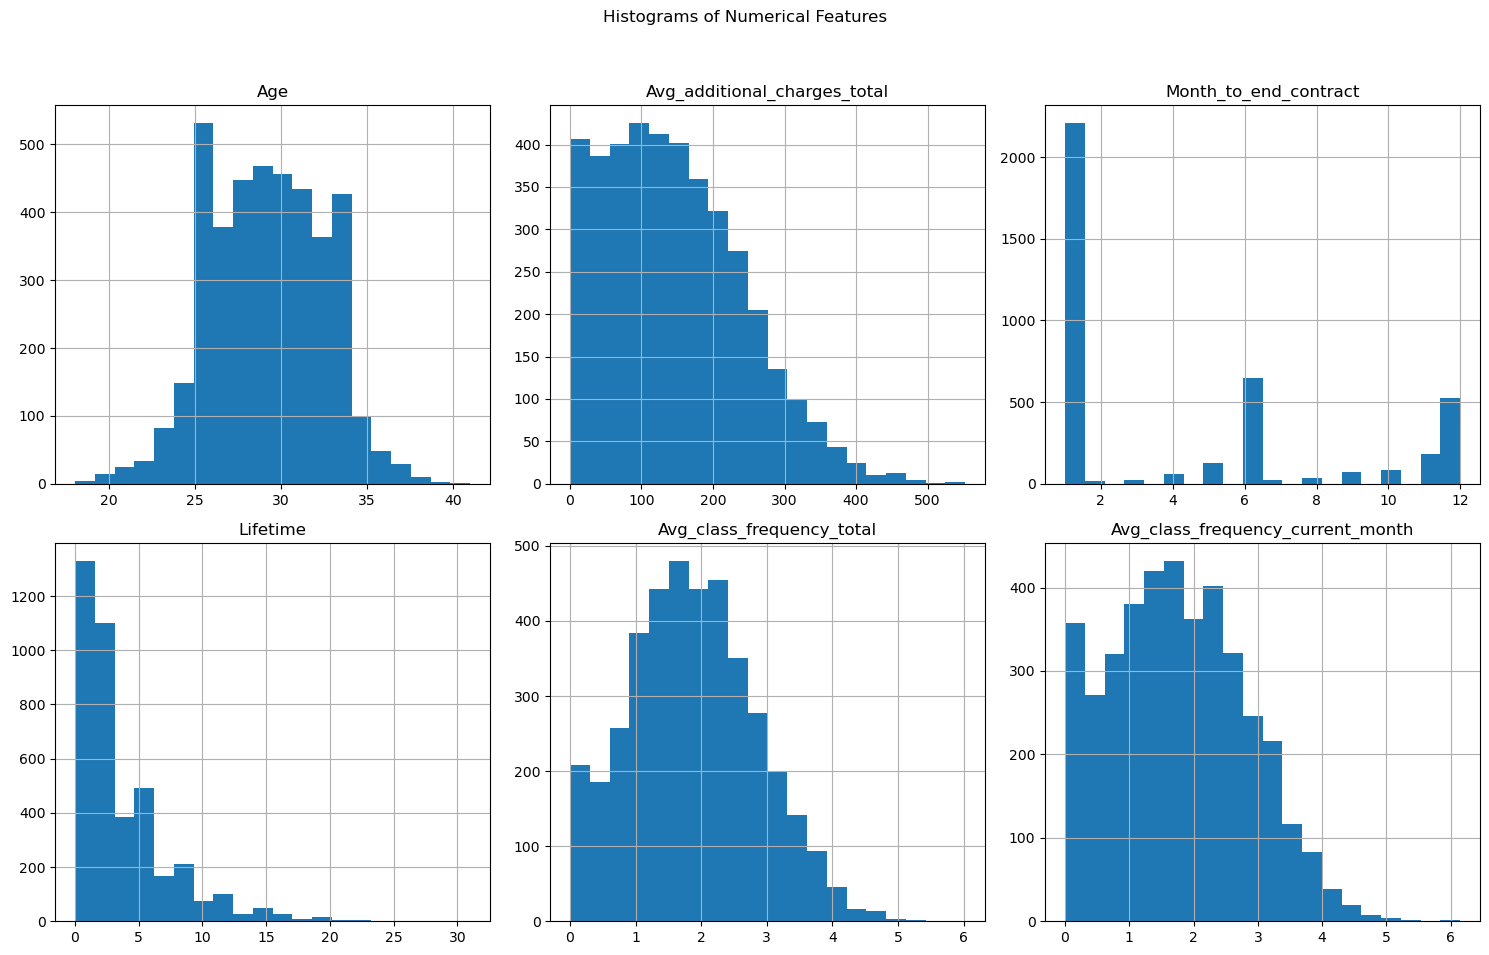

In [4]:
#Histogram of numerical features
import matplotlib.pyplot as plt

numerical_features = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract',
                      'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

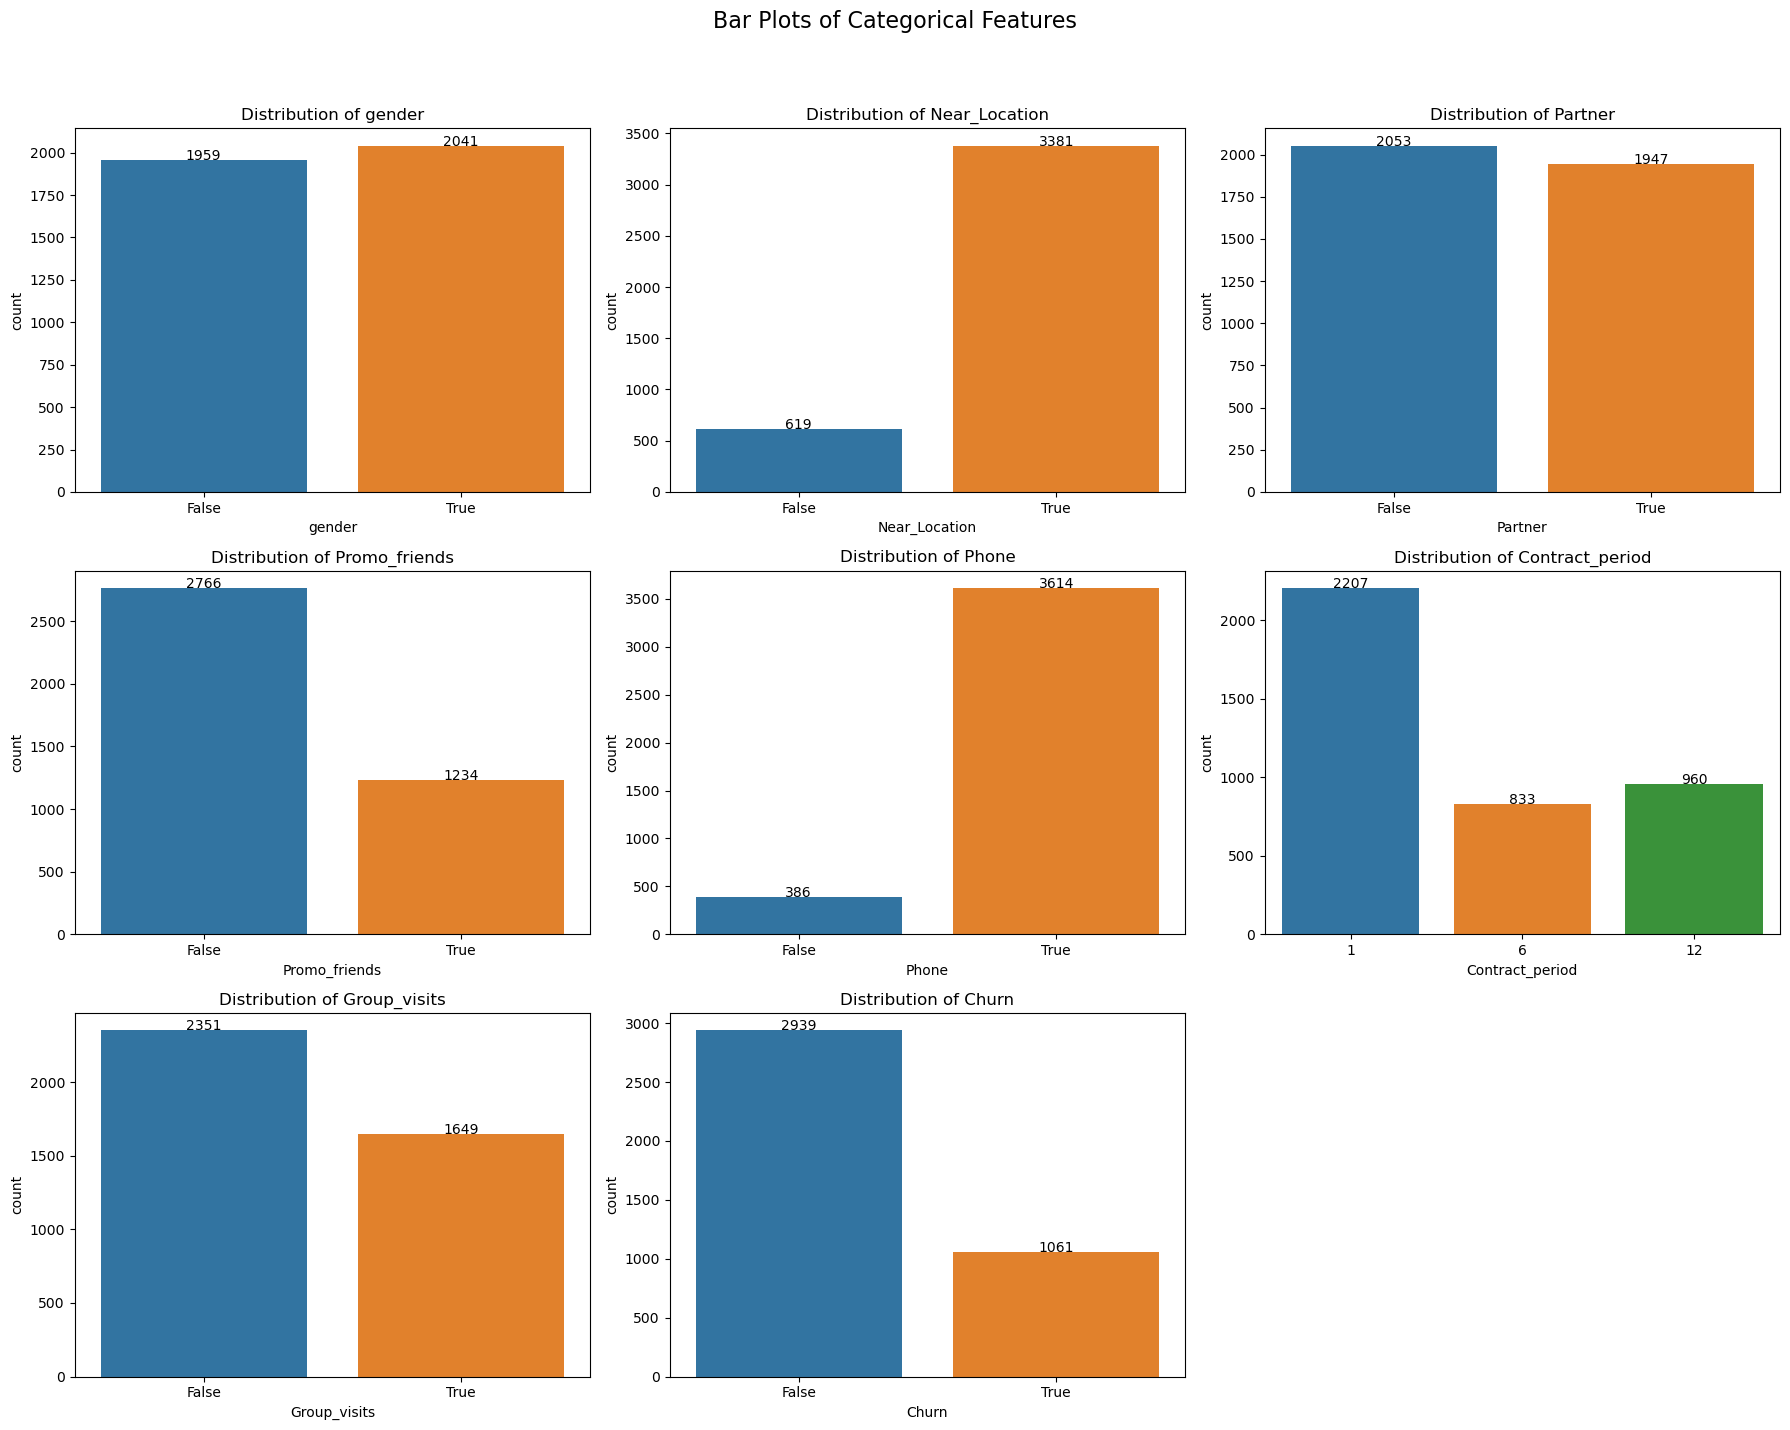

In [5]:
import seaborn as sns

categorical_features = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Churn']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.suptitle('Bar Plots of Categorical Features', fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center")

# Hide any unused subplots
for j in range(len(categorical_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

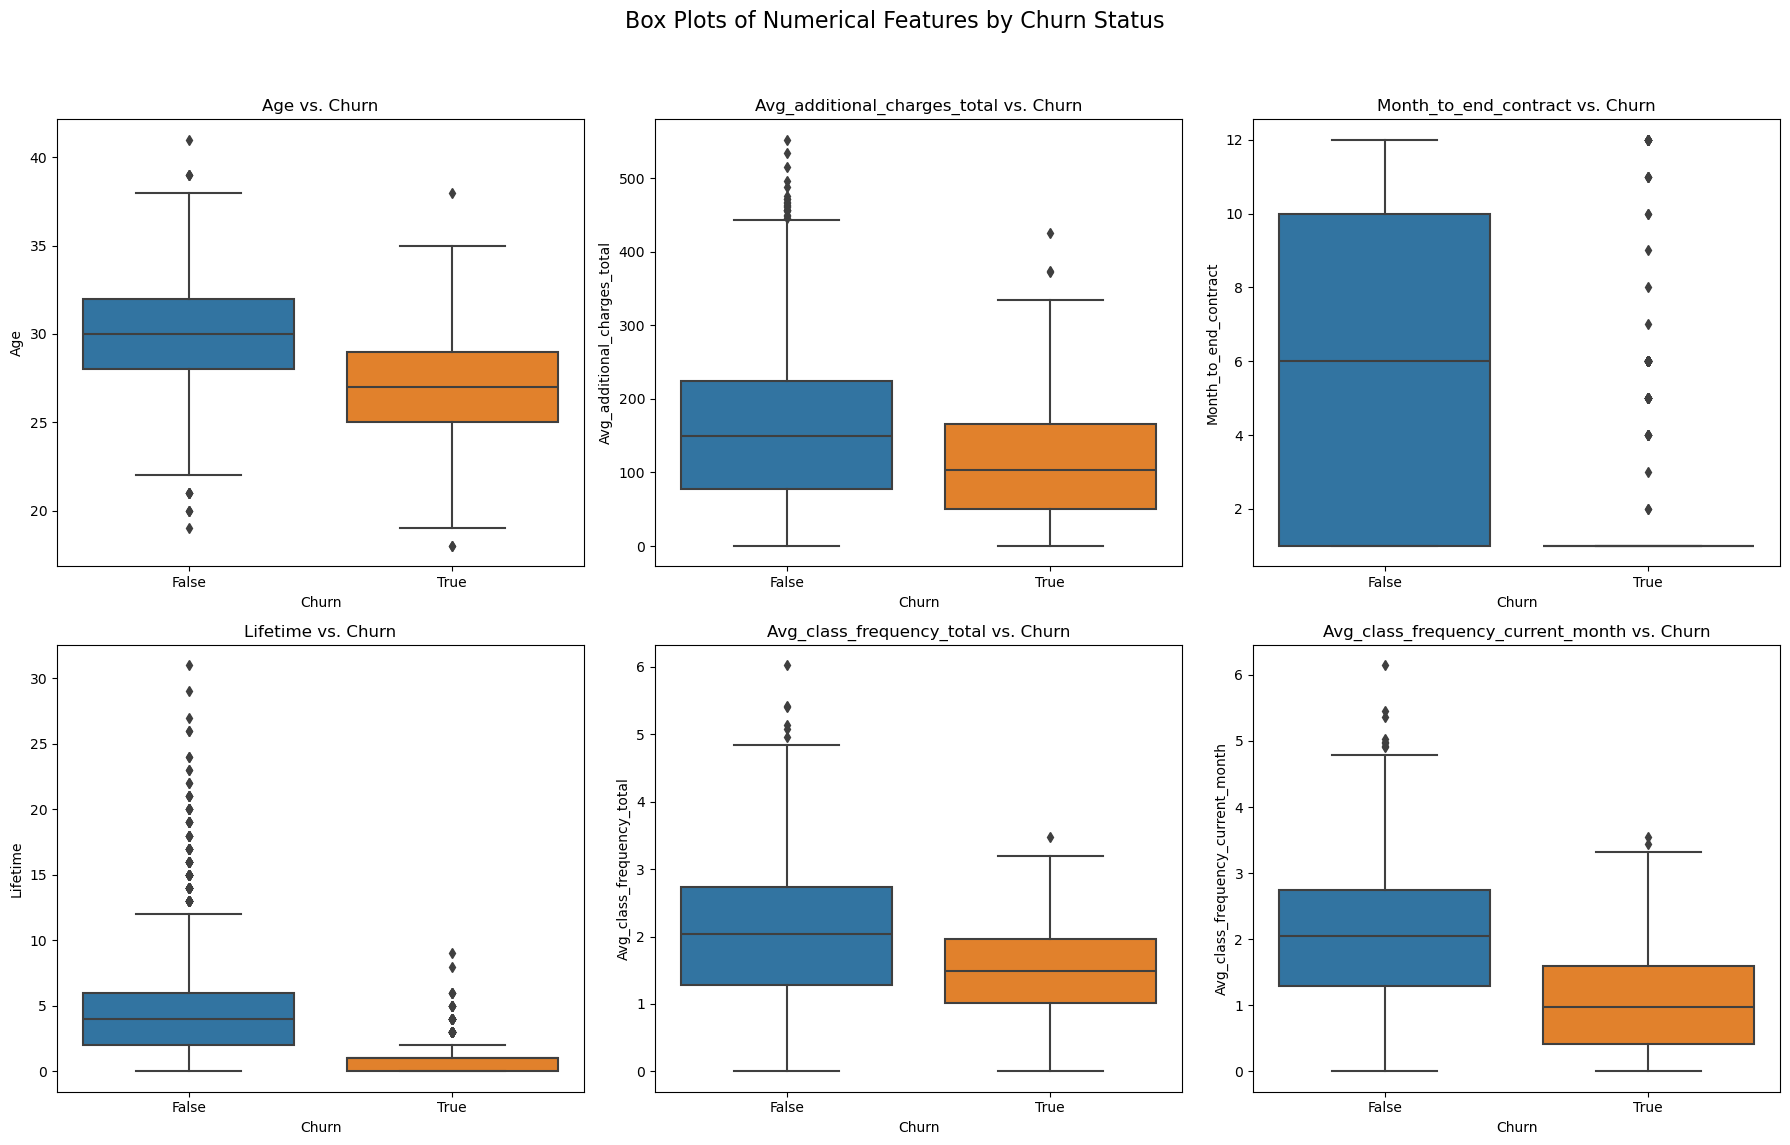

In [7]:
#Boxplots of numerical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Box Plots of Numerical Features by Churn Status', fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Churn', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Churn')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

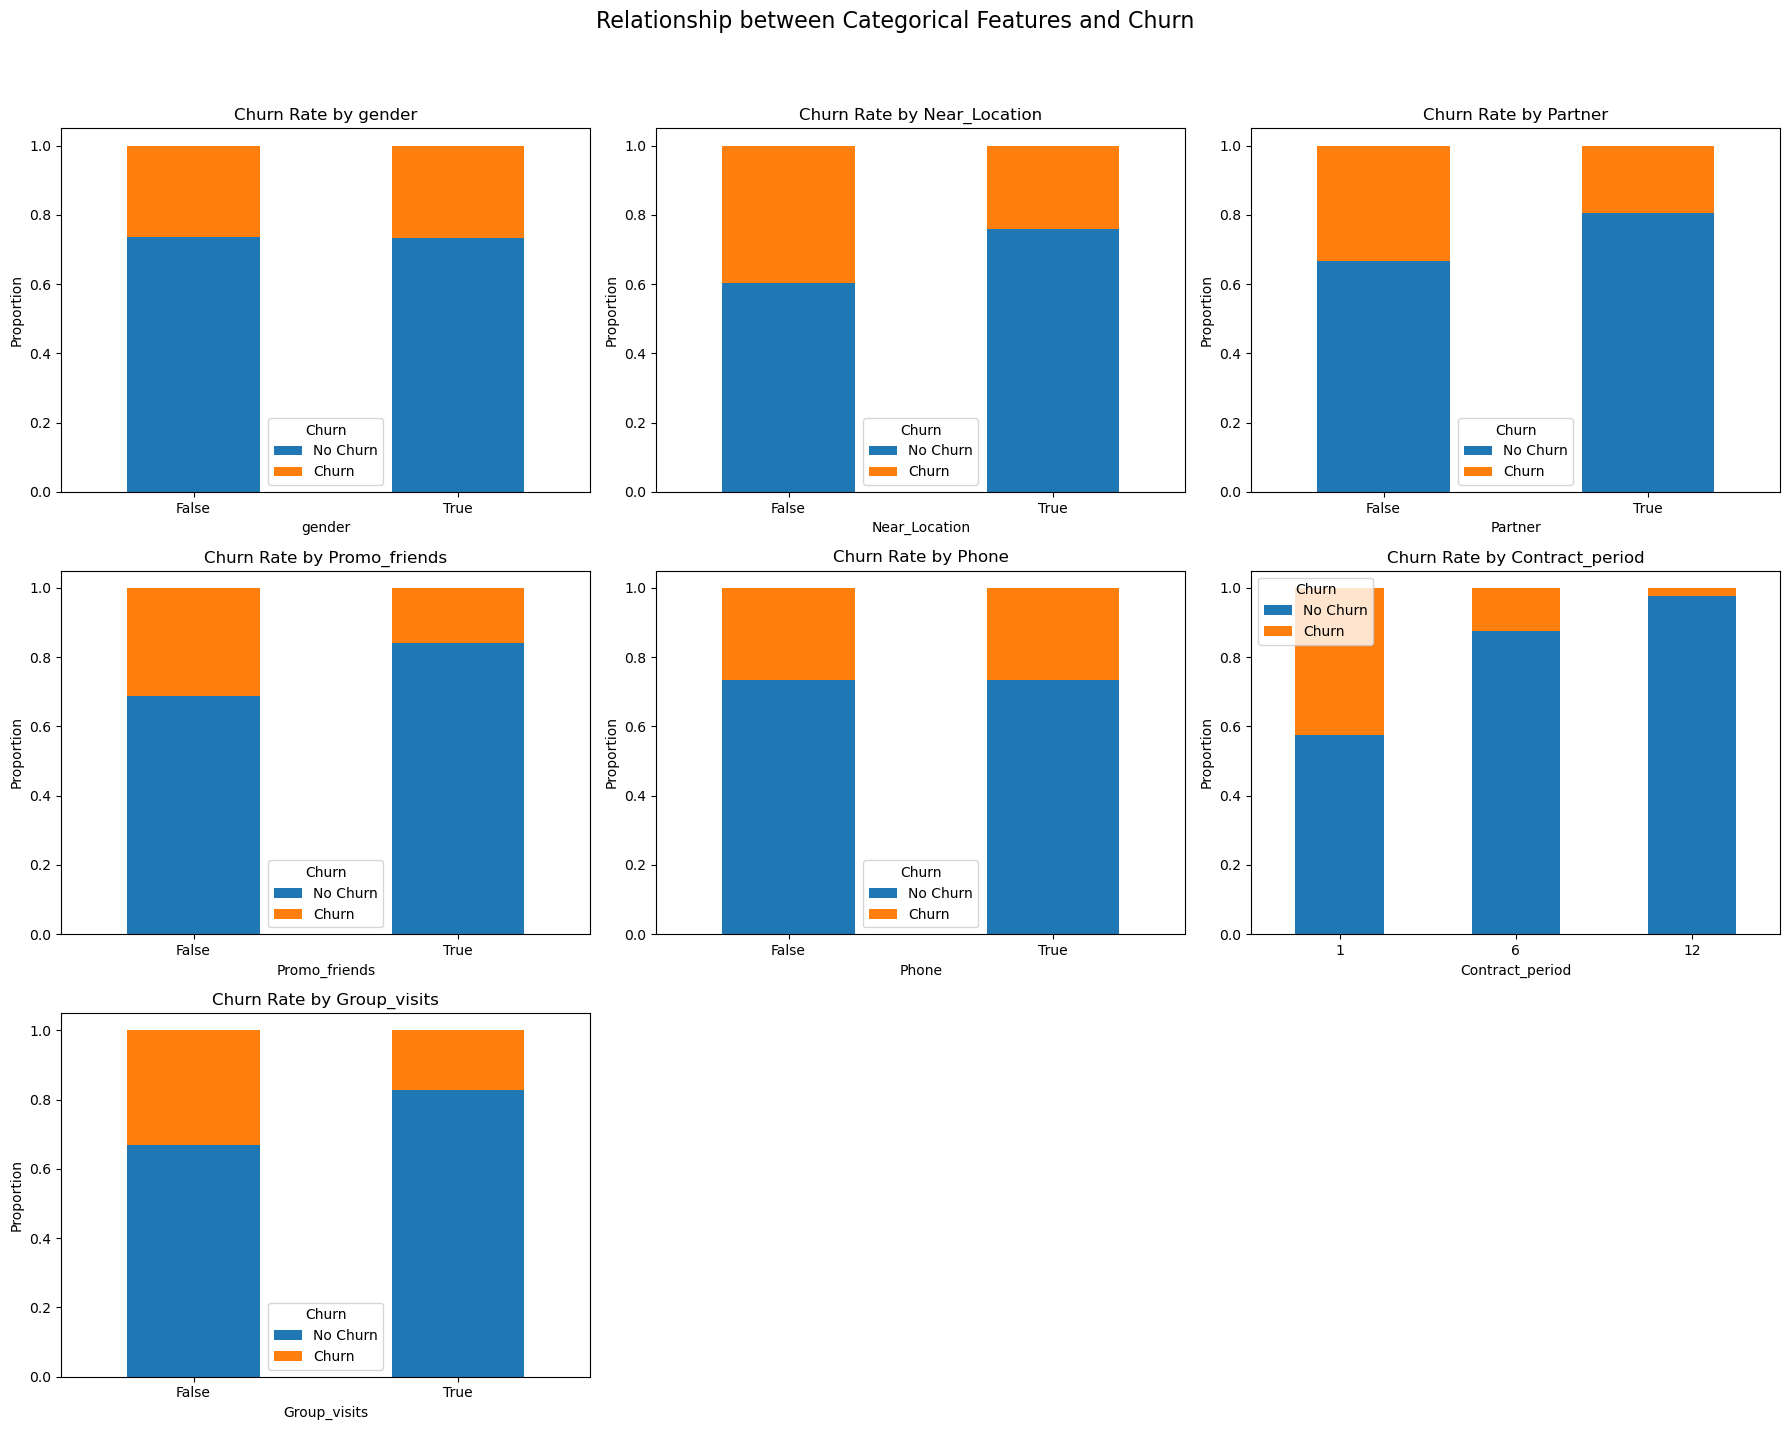

In [10]:
#Categorial vs Churn 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.suptitle('Relationship between Categorical Features and Churn', fontsize=16)

axes = axes.flatten()

categorical_vs_churn_features = [f for f in categorical_features if f != 'Churn']
for i, feature in enumerate(categorical_vs_churn_features):
    churn_rates = df.groupby(feature)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_rates.plot(kind='bar', stacked=True, ax=axes[i], rot=0)
    axes[i].set_title(f'Churn Rate by {feature}')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Churn', labels=['No Churn', 'Churn'])

# Hide any unused subplots
for j in range(len(categorical_vs_churn_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Pearson Correlation Matrix:
                                        Age  Avg_additional_charges_total  \
Age                                1.000000                      0.080240   
Avg_additional_charges_total       0.080240                      1.000000   
Month_to_end_contract              0.134511                      0.113958   
Lifetime                           0.164693                      0.079028   
Avg_class_frequency_total          0.119953                      0.044426   
Avg_class_frequency_current_month  0.183095                      0.079570   

                                   Month_to_end_contract  Lifetime  \
Age                                             0.134511  0.164693   
Avg_additional_charges_total                    0.113958  0.079028   
Month_to_end_contract                           1.000000  0.161078   
Lifetime                                        0.161078  1.000000   
Avg_class_frequency_total                       0.085387  0.112338   
Avg_class_fr

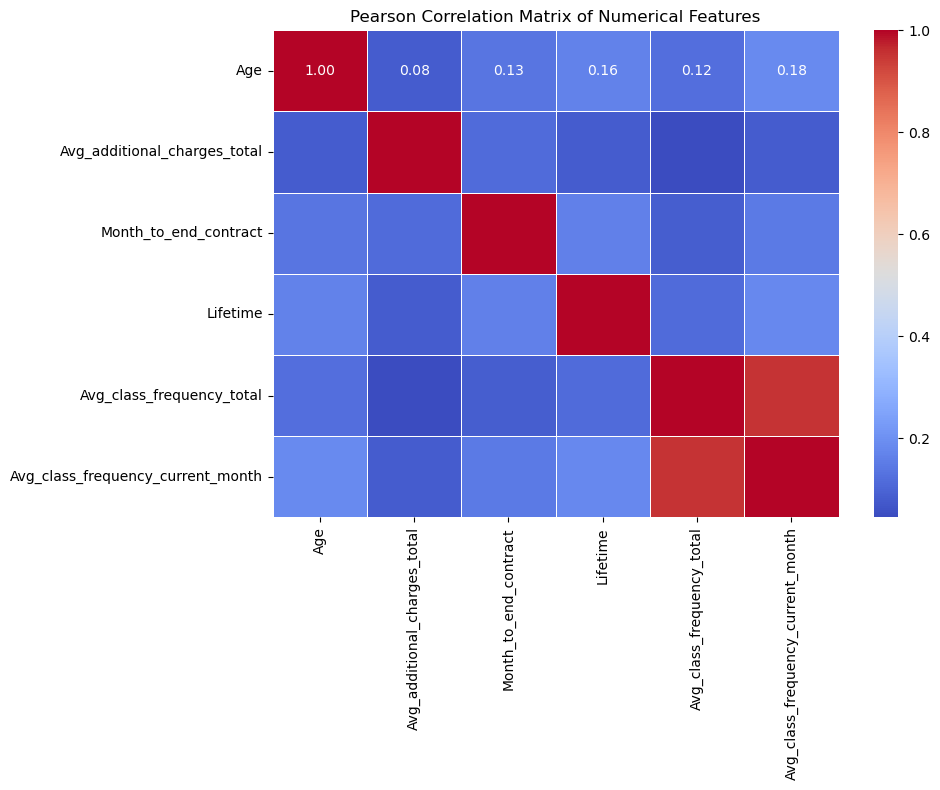

In [11]:
#Correlation analysis 
# Drop the target variable 'Churn' for the correlation matrix
numerical_df = df[numerical_features]
correlation_matrix = numerical_df.corr(method='pearson')

print("Pearson Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=0.5)
plt.title('Pearson Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()